In [1]:
import pandas as pd 
import matplotlib.pylab as plt
import numpy as np
import os 

In [2]:
# files=[file for file in os.listdir('/home/ekko/Data Science/cv_projects/sales_april_2019')]

# all_months_data=pd.DataFrame()

# for file in files:
#     df=pd.read_csv('/home/ekko/Data Science/cv_projects/sales_april_2019/'+file)
#     all_months_data=pd.concat([all_months_data,df])
# all_months_data.to_csv('/home/ekko/Data Science/cv_projects/sales_april_2019/new_Daata.csv',index=False)

# Read the data

In [3]:
df=pd.read_csv('/home/ekko/Data Science/cv_projects/sales_april_2019/all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean Data

In [4]:
#drop null rows
df=df.dropna()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### remove the wrong data

In [5]:
df=df[df['Order Date']!='Order Date']
df[515:520]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
520,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"
521,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016"
522,177057,Bose SoundSport Headphones,1,99.99,04/09/19 08:57,"585 Cherry St, New York City, NY 10001"


### convert str values  to numeric values

In [6]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])


# Add Arguments

### Add month attribute 

In [7]:
df['Month']=df['Order Date'].str[0:2]
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


### Add total price attribute 

In [8]:
df['Total Price']=df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


### Add City attribute

In [9]:
df['City']=df['Purchase Address'].apply(lambda x: "{} ({}) ".format(x.split(',')[1],x.split(',')[2].split(' ')[1]))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


### Add Time attribute 

In [10]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Time']=df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9


### Add Group attribute

In [11]:
ds=df[df['Order ID'].duplicated(keep=False)]
ds['Grouped']=df.groupby(['Order ID'])['Product'].transform(lambda x:','.join(x))

ds.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Time,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


##  What was the best month for sale ? and how much ?

In [12]:
m=df.groupby('Month')['Total Price'].sum().sort_values(ascending=False)
m

Month
12    4.613443e+06
10    3.736727e+06
04    3.390670e+06
11    3.199603e+06
05    3.152607e+06
03    2.807100e+06
07    2.647776e+06
06    2.577802e+06
08    2.244468e+06
02    2.202022e+06
09    2.097560e+06
01    1.822257e+06
Name: Total Price, dtype: float64

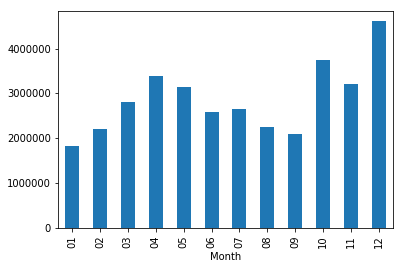

In [13]:
df.groupby('Month')['Total Price'].sum().plot.bar()

# What city the highest number of total price?

In [14]:
c=df.groupby('City')['Total Price'].sum().sort_values(ascending=False)
c

City
 San Francisco (CA)     8.262204e+06
 Los Angeles (CA)       5.452571e+06
 New York City (NY)     4.664317e+06
 Boston (MA)            3.661642e+06
 Atlanta (GA)           2.795499e+06
 Dallas (TX)            2.767975e+06
 Seattle (WA)           2.747755e+06
 Portland (OR)          1.870732e+06
 Austin (TX)            1.819582e+06
 Portland (ME)          4.497583e+05
Name: Total Price, dtype: float64

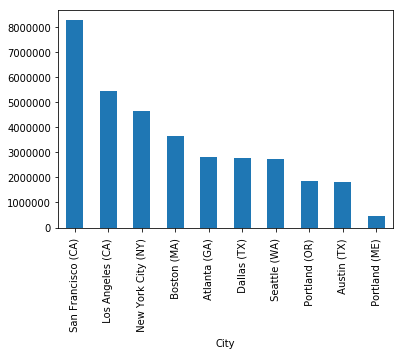

In [15]:
c.plot.bar()

### What time should we display advertisments to maxmize liklihoodof customer's buying product?

In [16]:
pr=df.groupby('Time')['Total Price'].count().sort_values(ascending=False)
pr.head()

Time
19    12905
12    12587
11    12411
18    12280
20    12228
Name: Total Price, dtype: int64

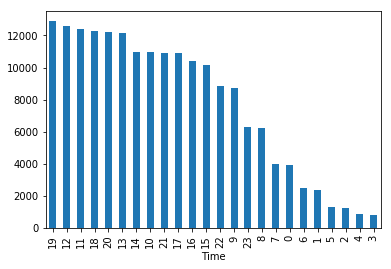

In [17]:
pr.plot.bar()
# i recommend to put Ads at [7] O'clock 

# What products are most often sold together? 

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9


In [19]:
ds=ds[['Order ID','Grouped']].drop_duplicates()
ds.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [20]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in ds['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
    
for key,value in count.most_common(10):
    print(key,value)

(('iPhone', 'Lightning Charging Cable'), 1005)
(('Google Phone', 'USB-C Charging Cable'), 987)
(('iPhone', 'Wired Headphones'), 447)
(('Google Phone', 'Wired Headphones'), 414)
(('Vareebadd Phone', 'USB-C Charging Cable'), 361)
(('iPhone', 'Apple Airpods Headphones'), 360)
(('Google Phone', 'Bose SoundSport Headphones'), 220)
(('USB-C Charging Cable', 'Wired Headphones'), 160)
(('Vareebadd Phone', 'Wired Headphones'), 143)
(('Lightning Charging Cable', 'Wired Headphones'), 92)


# What product sold the most ? and why ?

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9


In [22]:
df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

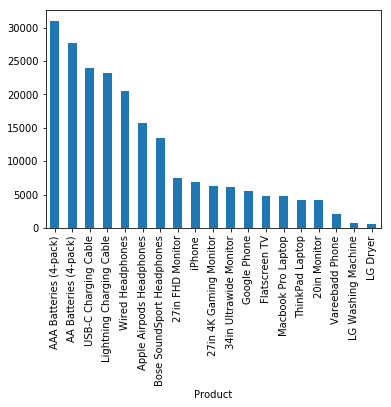

In [23]:
df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False).plot.bar()

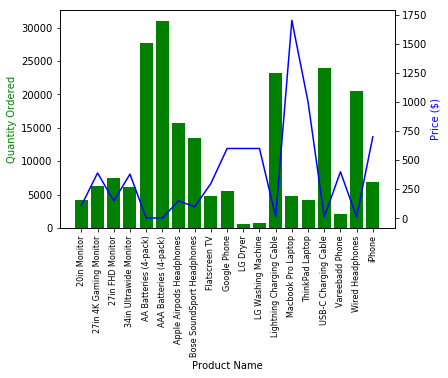

In [31]:

keys = [pair for pair, dfs in df.groupby('Product')]
quantity_ordered=df.groupby('Product')['Quantity Ordered'].sum()
dr=df.groupby(['Product']).mean()['Price Each']

fig,ax1=plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, dr, color='b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

plt.show()
#this is why  AAA Bataries sold alot because it is so low in price 